### Import Libraries

List of third party libraries we have access to:

- [numpy](http://www.numpy.org/) - numerical library, sort of like the Matlab of Python. Used internally by pandas.
- [pandas](http://pandas.pydata.org/pandas-docs/stable/) - data processing, statistics
- [matplotlib](https://matplotlib.org/tutorials/index.html) - plotting & graphing

We import them into our python files like this:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load a csv file into Python

We already have our libraries imported, lets import some data and test them out. In the data directory of our project is a file called `temps.csv` - this is the [daily minimum temperature in Melbourne, Australia, 1981-1990](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line).

Python has a standard library called `csv`, but we're going to use pandas to make this super easy.

In [2]:
# our notebook is in the notebooks directory, we need to go "up" to
# the root directory and then "into" the data directory with a relative path
file_path = '../data/temps.csv'

df = pd.read_csv(file_path) # df stands for "Data Frame"
df.date = pd.to_datetime(df.date)  # convert string based dates to python datetime objects
df.head()  # read the top values from the data frame

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


### Looking at our data

So we have the dates and temperatures stored in the variable `df`, which stands for a [Data Frame](https://github.com/mobileink/data.frame/wiki/What-is-a-Data-Frame%3F) (DF). When working with `numpy`, `pandas` and other scientific computing libraries Data Frames are the format we want our data in. Lets look at some basic statistics about this data:

In [3]:
df.describe()

,temp
count,3650.000000
mean,11.177315
std,4.073040
min,-0.800000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


In [4]:
df.dtypes

date    datetime64[ns]
temp           float64
dtype: object

So Python knows that from our `temps.csv` the dates are of type `datetime` and the temperatures are of type `float`. This lets it give us a very quick snapshot of what our data looks like. Note that if your csv file is corrupted or not formatted correctly you could get errors in this process, or Python may not interpret your data types as you expect it to (or at all).

### Manipulating Data

We imported data into Python from our csv file, we've taken a glance at it, now we can start working in it. Right now we are looking at the years 1981 - 1990. Lets only look at 1985. First we'll see how we can look at datetimes in Python:

In [5]:
from datetime import datetime

test_date = datetime(2018, 1, 27)
test_date.year

2018

So we want to filter our DF so only the year 1985 is visible:

In [6]:
year_selection = df[(df.date >= datetime(1985, 1, 1)) & (df.date < datetime(1986, 1, 1))]
year_selection.head()

,date,temp
1460,1985-01-01,13.3
1461,1985-01-02,15.2
1462,1985-01-03,13.1
1463,1985-01-04,12.7
1464,1985-01-05,14.6


Now we have a new dataframe - `year_selection` that only has values from 1985.

### Visualizing Data

Now that we can import, look at and manipulate our data lets plot it. Matplotlib is the de facto standard plotting library for Python. Note that we already imported it at the top of this file. We'll plot our `df` data on a graph:

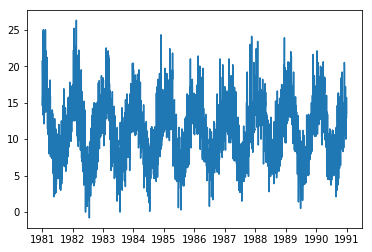

In [7]:
plt.plot(df.date, df.temp)
plt.show()

Compared to only our 1985 data stored in `year_selection`:

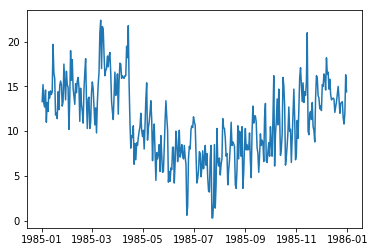

In [8]:
plt.plot(year_selection.date, year_selection.temp)
plt.show()

Add title and axis labels:

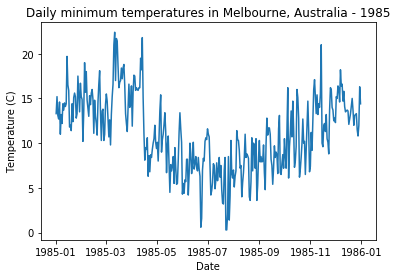

In [9]:
plt.plot(year_selection.date, year_selection.temp)
plt.title('Daily minimum temperatures in Melbourne, Australia - 1985')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.show()

We can add multiple plots at once and add a legend:

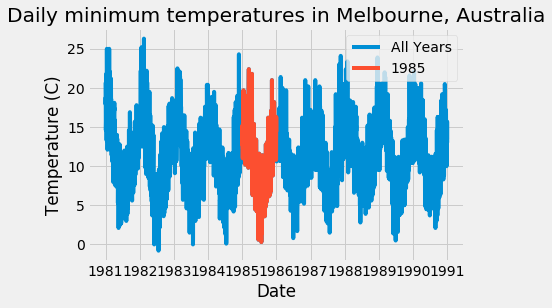

In [10]:
from matplotlib import style
style.use('fivethirtyeight')

plt.plot(df.date, df.temp, label="All Years")
plt.plot(year_selection.date, year_selection.temp, label="1985")

plt.title('Daily minimum temperatures in Melbourne, Australia')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()